# Navigation

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

  DEPRECATION: A future pip version will change local packages to be built in-place without first copying to a temporary directory. We recommend you use --use-feature=in-tree-build to test your packages with this new behavior before it becomes the default.
   pip 21.3 will remove support for this functionality. You can find discussion regarding this at https://github.com/pypa/pip/issues/7555.


The environment is already saved in the Workspace and can be accessed at the file path provided below.  Please run the next code cell without making any changes.

In [2]:
import numpy as np
import random
import torch
import matplotlib.pyplot as plt

from unityagents import UnityEnvironment
from collections import deque
from dqn_agent import Agent

# when using Udacity's online integrated workspace, uncomment the following line
# env = UnityEnvironment(file_name="/data/Banana_Linux_NoVis/Banana.x86_64")

# When working on own computer, make sure the path of the Banana application below is correct
# for environment with visualization (slower execution), uncomment following line
# env = UnityEnvironment(file_name="/home/maurice/Documents/Navigation/data/Banana_Linux/Banana.x86_64")

# for environment with headless machine (no visualization), uncomment next line
env = UnityEnvironment(file_name="/home/maurice/Documents/Navigation/data/Banana_Linux_NoVis/Banana.x86_64")

# NOTE: make sure only one env is defined !

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)

Number of agents: 1
Number of actions: 4
States look like: [1.         0.         0.         0.         0.84408134 0.
 0.         1.         0.         0.0748472  0.         1.
 0.         0.         0.25755    1.         0.         0.
 0.         0.74177343 0.         1.         0.         0.
 0.25854847 0.         0.         1.         0.         0.09355672
 0.         1.         0.         0.         0.31969345 0.
 0.        ]
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agent while it is training**, and you should set `train_mode=True` to restart the environment.

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score

while True:
    action     = np.random.randint(action_size)    # select an action
    env_info   = env.step(action)[brain_name]      # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward     = env_info.rewards[0]               # get the reward
    done       = env_info.local_done[0]            # see if episode has finished
    score     += reward                            # update the score
    state      = next_state                        # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

Score: 0.0


When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agent while it is training.  However, **_after training the agent_**, you can download the saved model weights to watch the agent on your own machine! 

In [7]:
# create a DQN agent 
from dqn_agent import Agent

agent = Agent(state_size=state_size, action_size=action_size, seed=0)


def dqn(agent, env, n_episodes=2000, max_t=1000, eps_start=0.99, eps_end=0.01, eps_decay=0.995):
    """Deep Q-Learning.
    
    Params
    ======
        n_episodes (int) : maximum number of training episodes
        max_t      (int) : maximum number of timesteps per episode
        eps_start (float): starting value of epsilon, for epsilon-greedy action selection
        eps_end   (float): minimum value of epsilon
        eps_decay (float): multiplicative factor (per episode) for decreasing epsilon
    """
    scores        = []                   # initialize empty list of scores
    scores_window = deque(maxlen=100)    # initialize empty score list of max length 100
    eps           = eps_start            # initalize epsilon value
    
    # run over all training episodes
    for episode in range(1, n_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name]   # reset environment and save info
        state    = env_info.vector_observations[0]          # extract environment state
        score    = 0                                        # initialize score to 0
        
        # run for all steps in one training episode
        for step in range(max_t):
            action     = agent.act(state, eps)                  # perform action given current policy
            env_info   = env.step(action)[brain_name]           # get environment infomation
            next_state = env_info.vector_observations[0]        # extract state from environment info
            reward     = env_info.rewards[0]                    # extract reward from environment info
            done       = env_info.local_done[0]                 # extract done callback
            agent.step(state, action, reward, next_state, done) # learning update
            score     += reward                                 # update score with reward
            state      = next_state                             # advance state to next state
            if done: break                                      # terminate episode when in termination state
                
        scores_window.append(score)          # append scores
        scores.append(score)                 # append scores
        eps = max(eps_end, eps_decay * eps)  # decrease epsilon
        
        # extract average episode score every 100 episodes
        if episode % 100 == 0:
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(episode, np.mean(scores_window)))
            
        # terminate training when average score is above 13.0    
        if np.mean(scores_window)>=13.0:
            print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(episode-100, np.mean(scores_window)))
            torch.save(agent.qnetwork_local.state_dict(), 'checkpoint.pth')
            break
            
    return scores

# run the Deep Q-Learning algorithm
scores = dqn(agent, env)

Episode 100	Average Score: 0.43
Episode 200	Average Score: 3.00
Episode 300	Average Score: 6.87
Episode 400	Average Score: 9.88
Episode 500	Average Score: 11.42

Environment solved in 461 episodes!	Average Score: 13.07


### 5. Show the results!

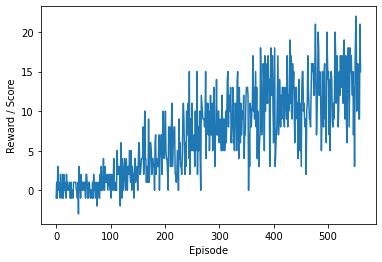

In [8]:
# plot the results
figure = plt.figure()
plt.plot(np.arange(len(scores)), scores)
plt.xlabel('Episode')
plt.ylabel('Reward / Score')
plt.show()

In [9]:
agent.qnetwork_local.load_state_dict(torch.load('checkpoint.pth')) # load in the trained agent weights

env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score

while True:
    action   = agent.act(state)                    # select an action with trained policy
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))

env.close()

Score: 14.0
